In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# Hiển thị full data frame:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None) 

In [3]:
data = pd.read_excel('D:\BME\data\drug.xlsx')

In [4]:
data_x = data.copy()
data.head()

,Mã đơn hàng,Mã KH,Tên KH,Tỉnh,Quận/huyện,Xã/phường,Ngày,SDT,Tên nhân viên,Chi nhánh,Mã thuốc,Tên thuốc,Đơn vị,Số lượng,Đơn giá
0,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,G00817,Golistin-enema for children,LO,50.0,26667.0
1,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,G00821,Golistin-enema,LO,30.0,35238.0
2,0c705e68-cbff-4c25-b860-881c51d7b291,N00146,Nhà thuốc Bệnh viện Nam Thăng Long,Thành phố Hà Nội,Quận Bắc Từ Liêm,Phường Xuân Đỉnh,2018-10-04,983855018.0,Phạm Thu Trang,Chi nhánh Hà Nội,P01191,Phenhalal,ONG,200.0,3950.0
3,196999A6-37EE-405C-8B9E-33E48A0455DC,P00641,Phòng khám đa khoa Hoàng Dũng - Quảng Trị,Tỉnh Quảng Trị,Thành phố Đông Hà,Phường 1,2018-10-04,977519929.0,Lưu Hữu Công,Chi nhánh Đà Nẵng,Z00209,Zentokid - H10,ONG,400.0,6500.0
4,5a1d6b35-5755-44d7-ad79-14f60dd4f0ef,B00670,Bệnh Viện Đa Khoa Huyện Tuyên Hóa ( Nhà Thuốc),Tỉnh Quảng Bình,NaN,Thị Trấn Đồng Lê -Huyện Tuyên Hoá -Tỉnh Quảng Bình,2018-10-04,911561101.0,Ngô Minh Anh Văn,Chi nhánh Đà Nẵng,H00852,Hemotocin,LO,10.0,235700.0


### Loại bỏ cột, dổi tên, lọc dữ liệu

In [5]:
data = data.drop(['Mã KH','Tên KH', 'Xã/phường', 'SDT', 'Tên nhân viên','Chi nhánh'], axis=1)

data.columns = ['orderID', 'province', 'district', 'date', 'drugsID','drugsName', 'unit', 'order_numbers', 'unit_price']

data = data[(data.province == 'Tỉnh Nghệ An') | (data.province == "Nghệ An")]
data.province=data.province.replace(['Nghệ An', 'Tỉnh Nghệ An'], 'NA')

In [6]:
data1 = data.copy()
# data = data1

In [7]:
data.province.value_counts()

NA    31611
Name: province, dtype: int64

In [8]:
data1.head()

,orderID,province,district,date,drugsID,drugsName,unit,order_numbers,unit_price
54,206ac048-29e8-4601-a9b3-d0a91b72d128,NA,TT Nam Đàn,2018-10-17,G00898,Guacanyl - Hộp 4 vỉ x 5 ống 5ml,ONG,60.0,3800.000000
59,874F745A-568A-4CBE-8490-36B6B7284552,NA,Huyện Quỳnh Lưu,2018-10-17,G00898,Guacanyl - Hộp 4 vỉ x 5 ống 5ml,ONG,400.0,2850.000000
89,09B56B0F-2C71-44E3-A83A-0244FB3C1DA4,NA,Diễn Châu,2018-10-19,Z00200,Zensalbu nebules 2.5,ONG,40.0,4200.000000
112,85655F04-A7E4-4218-87A5-497D1BA4399D,NA,Huyện Yên Thành,2018-10-22,D01085,Domuvar - H20,ONG,600.0,2653.922459
124,349B15D6-46CA-4229-ADE5-79B3B67C798F,NA,Thành phố Vinh,2018-10-22,Z00197,Zensalbu nebules 5.0,ONG,20.0,8000.000000


### Đồng nhất tên thành phố và huyện

In [9]:
data.district.value_counts()

Thành phố Vinh                                                12903
Huyện Quỳnh Lưu                                                3745
Huyện Diễn Châu                                                3136
Huyện Nghi Lộc                                                 1909
Huyện Yên Thành                                                1119
Thị xã Hoàng Mai                                                910
Thị xã Thái Hòa                                                 886
Huyện Nghĩa Đàn                                                 750
Huyện Thanh Chương                                              640
Huyện Đô Lương                                                  484
Huyện Nam Đàn                                                   446
Huyện Hưng Nguyên                                               398
Thị xã Cửa Lò                                                   380
Huyện Anh Sơn                                                   320
Huyện Quỳ Hợp                                   

In [10]:
data['district'] = data['district'].str.lower()
data['district'] = data['district'].str.replace(' ', '')

In [11]:
data.district.value_counts()

thànhphốvinh                                      12903
huyệnquỳnhlưu                                      3745
huyệndiễnchâu                                      3136
huyệnnghilộc                                       1909
huyệnyênthành                                      1119
thịxãhoàngmai                                       910
thịxãtháihòa                                        886
huyệnnghĩađàn                                       750
huyệnthanhchương                                    640
huyệnđôlương                                        486
huyệnnamđàn                                         446
tpvinh                                              412
huyệnhưngnguyên                                     398
thịxãcửalò                                          383
huyệnanhsơn                                         320
huyệnquỳhợp                                         296
thịxãtháihoà                                        246
quỳnhlưu                                        

In [12]:
data.district=data.district.replace(['thànhphốvinh', 'tpvinh','Vinh', 
                                     'quỳnhvinh,txhoàngmai,nghệan ',
                                     'tpvinh-nghệan', ' tpvinh-nghệan','trườngthi,tpvinh',
                                     'hưngdũng,tpvinh','phườnghưngphúc-tpvinh',
                                     'đườnglêviếtthuật_xãhưnglộc','phườnghưngbình_tpvinh','phườnghưngbình', 'huyệnhưnglộc_tpvinh'
                                     ,'phườnghưngdũng', '0913386216','nghiphú,tpvinh','phườngvinhtân','quánbàu', 'nghệan', 'nghiliên','trườngthi'
                                     ,'0974383686','xóm20xãnghiphú,tpvinh','khoanội-bệnhviêntâybắc','bệnhviệntâybắc',
                                      'hàhuytập','p.lêmaotpvinh' ], 
                                     'vinh')

data.district=data.district.replace(['huyệnquỳnhlưu', 'quỳnhlưu', 
                                     'xãsơnhải,huyệnquỳnhlưu', 'ttcầugiát,huyệnquỳnhlưu', 
                                     'quỳnhvănquỳnhlưu,nghệan', 'quỳnhlưu,nghệan','thịtrấncầugiát,huyệnquỳnhlưu'], 
                                     'quynh_luu')

data.district=data.district.replace(['huyệndiễnchâu','diễnchậ','diễnchâu','xãdiễnyênhuyệndiễnchâu-nghệan'],'dien_chau')

data.district=data.district.replace(['huyệnnghilộc','nghilộc'],'nghi_loc')

data.district=data.district.replace(['huyệnyênthành','yênthành','thịtrấnyênthành'], 'yen_thanh')

data.district=data.district.replace(['huyệnnghĩađàn','nghĩađàn','nghĩahồng,nghĩađàn'],'nghia_dan')

data.district=data.district.replace(['huyệnthanhchương','ttdùng,thanhchương','ttthanhhà'], 'thanh_chuong')

data.district=data.district.replace(['huyệnđôlương','đôlương','thịtrấnđôlương','huyệnđôlương_nghệan'],'do_luong')

data.district=data.district.replace(['huyệnhưngnguyên','hưngphúc','hưngnguyên'], 'hung_nguyen')
data.district=data.district.replace(['huyệnnamđàn','namđàn','ttnamđàn'],'nam_dan')
data.district=data.district.replace(['huyệnanhsơn'],'anh_son')
data.district=data.district.replace(['huyệnquỳhợp','quỳhợp','thịtrấnquỳhợp,huyềnquỳhợp','tamhợp,quỳhợp','nghĩaxuân,quỳhợp'], 'quy_hop')
data.district=data.district.replace(['huyệntânkỳ','thịtrấntânkỳ'], 'tan_ky')
data.district=data.district.replace(['huyệnconcuông'],'con_cuong')
data.district=data.district.replace(['huyệnquỳchâu','quỳchâu'],'quy_chau')
data.district=data.district.replace(['huyệnquếphong'],'que_phong')
data.district=data.district.replace(['huyệntươngdương','tươngdương'],'tuong_duong')
data.district=data.district.replace(['huyệnkỳsơn'],'ky_son')
data.district=data.district.replace(['thịxãhoàngmai','quỳnhvinh,txhoàngmai,nghệan','hoàngmai','khốithinhhmỹphườngquỳnhthiện-txhoàngmai-nghệan','thịxãhoàngmai,nghệan','quỳnhthiện,txhoàngmai'],'tx_hoang_mai')
data.district=data.district.replace(['thịxãtháihòa','thịxãtháihoà'],'tx_thai_hoa')
data.district=data.district.replace(['thịxãcửalò','txcửalò','cửalò','cửahội'], 'tx_cua_lo')

In [13]:
data.district.value_counts()

vinh            13433
quynh_luu        3968
dien_chau        3199
nghi_loc         1932
yen_thanh        1142
tx_thai_hoa      1132
tx_hoang_mai      945
nghia_dan         784
thanh_chuong      645
nam_dan           514
do_luong          490
hung_nguyen       423
tx_cua_lo         407
quy_hop           330
anh_son           320
tan_ky            176
con_cuong         161
quy_chau           78
que_phong          65
tuong_duong        19
ky_son             14
Name: district, dtype: int64

In [14]:
data2 = data.copy()

In [15]:
data.district = data.district.fillna('vinh')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31611 entries, 54 to 791532
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderID        31611 non-null  object        
 1   province       31611 non-null  object        
 2   district       31611 non-null  object        
 3   date           31611 non-null  datetime64[ns]
 4   drugsID        31611 non-null  object        
 5   drugsName      31611 non-null  object        
 6   unit           31611 non-null  object        
 7   order_numbers  31611 non-null  float64       
 8   unit_price     31611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.4+ MB


### Chia thời gian

In [17]:
data=data.rename(columns={'date':'time'})
data3 = data.copy()

In [18]:
# create new columns for date, month, quarter, and year
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['quarter'] = data['time'].dt.quarter
data['year'] = data['time'].dt.year


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31611 entries, 54 to 791532
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderID        31611 non-null  object        
 1   province       31611 non-null  object        
 2   district       31611 non-null  object        
 3   time           31611 non-null  datetime64[ns]
 4   drugsID        31611 non-null  object        
 5   drugsName      31611 non-null  object        
 6   unit           31611 non-null  object        
 7   order_numbers  31611 non-null  float64       
 8   unit_price     31611 non-null  float64       
 9   day            31611 non-null  int64         
 10  month          31611 non-null  int64         
 11  quarter        31611 non-null  int64         
 12  year           31611 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 3.4+ MB


In [20]:
# cate_cols = ['district', 'drugsID', 'unit']
# for c in cate_cols:
#     data[c] = data[c].astype('category')
# data.info()

In [21]:
data = data3

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31611 entries, 54 to 791532
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderID        31611 non-null  object        
 1   province       31611 non-null  object        
 2   district       31611 non-null  object        
 3   time           31611 non-null  datetime64[ns]
 4   drugsID        31611 non-null  object        
 5   drugsName      31611 non-null  object        
 6   unit           31611 non-null  object        
 7   order_numbers  31611 non-null  float64       
 8   unit_price     31611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.4+ MB


### Kiểm tra tên thuốc

In [23]:
len(data.drugsID.unique())

240

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31611 entries, 54 to 791532
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   orderID        31611 non-null  object        
 1   province       31611 non-null  object        
 2   district       31611 non-null  object        
 3   time           31611 non-null  datetime64[ns]
 4   drugsID        31611 non-null  object        
 5   drugsName      31611 non-null  object        
 6   unit           31611 non-null  object        
 7   order_numbers  31611 non-null  float64       
 8   unit_price     31611 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.4+ MB


In [25]:
uni_drugs = data.iloc[:,4:6]
uni_drugs = uni_drugs.drop_duplicates() # a table to check name of drugs
data = data.drop('drugsName', axis=1)

In [26]:
len(uni_drugs) # does not equal 234 because drugs have more than 1 name or are grammatically incorrect

302

In [27]:
data_xx = data.copy()

### Tạo dữ liệu theo các khoảng thời  gian

#### Tạo dữ liệu theo tháng

In [31]:
df_month = data.groupby([pd.to_datetime(data['time']).dt.strftime('%Y-%m'), 'drugsID'])['order_numbers'].sum().reset_index()
df_month.head(10)

,time,drugsID,order_numbers
0,2018-10,A01237,200.0
1,2018-10,B01141,940.0
2,2018-10,D01063,400.0
3,2018-10,D01085,1400.0
4,2018-10,G00817,30.0
5,2018-10,G00821,50.0
6,2018-10,G00898,460.0
7,2018-10,M01076,30.0
8,2018-10,N00875,400.0
9,2018-10,O00583,150.0


In [32]:
print('Min date from train set: %s' % df_month['time'].min())
print('Max date from train set: %s' % df_month['time'].max())

Min date from train set: 2018-10
Max date from train set: 2022-07


In [33]:
df = pd.pivot_table(df_month, values='order_numbers', index='time', columns='drugsID', aggfunc=np.sum)
# df = pd.DataFrame(df
df = df.reset_index()
df = df.fillna(0)
df.set_index('time', inplace=True)
#true table (same excel)
df.head(10)

drugsID,A01194,A01217,A01237,A01252,A01259,A01264,A01268,A01272,A01303,A01338,A01341,A01348,A01379,A01401,A01408,A01411,A01414,A01500,B01113,B01141,B01163,B01166,B01178,B01235,B01244,B01247,B01304,B01308,B01332,B01338,B01347,B01373,B01414,B01463,B01472,B01514,B01570,B01585,B01586,C01829,C01842,C01942,C02136,C02283,D01057,D01063,D01078,D01085,D01107,D01116,D01149,D01160,D01169,D01183,D01198,D01215,D01260,D01304,D01311,D01335,D01349,D01355,D01357,D01366,D01375,D01425,D01449,D01502,D01510,D01519,D01522,D01533,D01599,D01643,E00471,F00440,F00443,F00464,F00472,F00482,F00490,F00507,F00512,F00550,F00598,F00609,G00817,G00821,G00862,G00869,G00898,G00910,G00911,G00939,G00943,G00951,G00955,G00971,G00973,G00999,G01006,G01021,H00852,H00902,H00905,H00920,H00979,H01031,H01036,H01039,H01068,H01121,H01210,H01224,H01251,H01913,H01921,H01924,H01930,H02087,H02098,H02101,K00511,K00628,L00726,L00750,L00763,L00784,L00793,L00801,L00822,L00837,L00847,L00854,L00877,L00905,L00908,L00993,L01005,L01012,L01021,L01026,L01038,L01052,L01053,L01057,L01058,M01045,M01070,M01076,M01090,M01096,M01215,M01225,M01327,M01331,M01476,M01596,M01605,M01656,N00520,N00826,N00845,N00864,N00875,N00922,N00928,N00941,N00979,N00994,N01007,N01010,N01013,N01041,N01080,N01084,N01108,N01165,N01195,N01200,N01257,N01260,N01299,O00583,P01083,P01087,P01146,P01191,P01260,P01275,P01278,P01291,P01299,P01336,P01349,P01364,P01394,P01411,P01452,P01475,P01478,P01481,P01487,P01532,P01605,Q00087,Q00103,Q00108,R00329,R00342,R00365,R00376,S01123,S01242,S01434,S01447,T01684,T01701,T01711,T01855,T01864,T02071,T02722,U00134,V01000,V01101,V01106,V01114,Z00197,Z00200,Z00209,Z00219,Z00226,Z00230,Z00236,Z00241,Z00244,Z00253,Z00290,Z00294
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,50.0,0.0,0.0,460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,350.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-11,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,10.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,50.0,0.0,165.0,460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2210.0,950.0,2100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [35]:
zero_counts = (df == 0).sum(axis=0)
zero_counts

drugsID
A01194    43
A01217    42
A01237     2
A01252    44
A01259    38
A01264    37
A01268    28
A01272    21
A01303     4
A01338    16
A01341    37
A01348    30
A01379    31
A01401    28
A01408    28
A01411    27
A01414    31
A01500    33
B01113    43
B01141    43
B01163    15
B01166     6
B01178    23
B01235    13
B01244    34
B01247    29
B01304     9
B01308    26
B01332    17
B01338    22
B01347    21
B01373    10
B01414    43
B01463    33
B01472    40
B01514    36
B01570    40
B01585    41
B01586    44
C01829    11
C01842     4
C01942    34
C02136    36
C02283    44
D01057     9
D01063    24
D01078    19
D01085     5
D01107    32
D01116    45
D01149    22
D01160    41
D01169    42
D01183    36
D01198    34
D01215    29
D01260    21
D01304     9
D01311    24
D01335    19
D01349    19
D01355    22
D01357    33
D01366    36
D01375    17
D01425    28
D01449    38
D01502    43
D01510    40
D01519    33
D01522    31
D01533    30
D01599    40
D01643    45
E00471    36
F00440    44
F004

#### Loại bỏ các thuốc có 0 > 15

In [36]:
# fill NaN == 0
df = df.fillna(0)

# set threshold for number of zeros
threshold = 15

# drop columns with more than the threshold number of zeros
df_month1 = df.loc[:, (df == 0).sum() <= threshold]
df_month1.describe()

drugsID,A01237,A01303,B01163,B01166,B01235,B01304,B01373,C01829,C01842,D01057,D01085,D01304,F00464,G00817,G00821,G00862,G00869,G00898,H00852,H00902,H01121,L00822,M01076,M01090,M01225,N00845,N00864,N00875,N00922,N00979,O00583,P01191,P01299,Q00087,T01701,Z00197,Z00200,Z00209,Z00219,Z00226,Z00241
count,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2228.26087,422.478261,156.304348,2791.086957,1075.217391,114.304348,1625.673913,1389.565217,4688.695652,2496.521739,4009.565217,816.086957,8343.478261,154.173913,424.130435,1096.782609,498.369565,3334.782609,276.739130,1641.304348,1018.478261,160.043478,473.826087,90.478261,273.152174,92063.717391,2294.130435,1493.478261,1396.739130,635.000000,140.869565,2400.000000,695.217391,716.956522,48.260870,14253.695652,4652.282609,1314.826087,5866.108696,6027.934783,21.543478
std,2359.12065,581.139369,184.744372,2399.603882,1760.733104,125.607125,1857.911851,1520.103734,4598.066071,3202.005772,5161.491153,906.878598,3896.018462,137.072617,397.986354,1393.879062,376.309941,3521.780950,318.048245,1717.823699,1024.261181,178.880712,653.418338,93.824124,298.302082,187411.012397,2028.251383,1906.577174,1218.554799,810.620476,71.982284,2919.549433,826.561120,1010.741465,80.393873,11117.449020,3747.073481,932.136025,7655.104433,7157.890525,20.468628
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,250.000000,260.000000,0.000000,0.000000,0.000000
25%,710.00000,48.500000,0.000000,810.000000,0.000000,11.250000,130.000000,125.000000,1460.000000,425.000000,600.000000,125.000000,6050.000000,65.750000,184.250000,0.000000,248.500000,925.000000,92.500000,330.000000,0.000000,12.500000,16.250000,20.500000,45.250000,200.000000,848.750000,32.500000,400.000000,0.000000,100.000000,125.000000,110.000000,0.000000,6.250000,6560.000000,2160.000000,752.500000,800.000000,1570.000000,7.000000
50%,1210.00000,98.500000,100.000000,2070.000000,60.000000,77.500000,1110.000000,950.000000,4290.000000,1440.000000,1420.000000,390.000000,9420.000000,105.000000,334.000000,315.000000,506.000000,2200.000000,182.500000,1195.000000,750.000000,100.000000,65.500000,47.000000,149.500000,1925.000000,1800.000000,585.000000,1310.000000,500.000000,145.000000,700.000000,420.000000,275.000000,28.000000,10430.000000,4155.000000,1035.000000,2192.500000,3425.000000,16.500000
75%,3100.00000,575.000000,200.000000,4755.000000,2022.500000,220.000000,2315.000000,2175.000000,6610.000000,3235.000000,5750.000000,1375.000000,10800.000000,223.750000,518.250000,1842.500000,650.000000,4310.000000,385.000000,2212.500000,1775.000000,237.500000,700.000000,138.500000,482.750000,96097.500000,3248.750000,2262.500000,1940.000000,950.000000,200.000000,4250.000000,1005.000000,1000.000000,58.250000,20117.500000,6035.000000,1847.500000,6875.000000,7850.000000,30.000000
max,10100.00000,2600.000000,880.000000,7520.000000,8920.000000,530.000000,8920.000000,5920.000000,25790.000000,14400.000000,18000.000000,3940.000000,15800.000000,550.000000,2435.000000,5270.000000,2205.000000,13220.000000,1860.000000,6100.000000,3300.000000,800.000000,2530.000000,321.000000,1256.000000,938400.000000,10290.000000,7070.000000,5040.000000,3960.000000,300.000000,8640.000000,3720.000000,3800.000000,505.000000,49950.000000,17990.000000,5520.000000,27010.000000,28461.000000,85.000000


Text(0.5, 1.0, 'Drug Consumption Over Time')

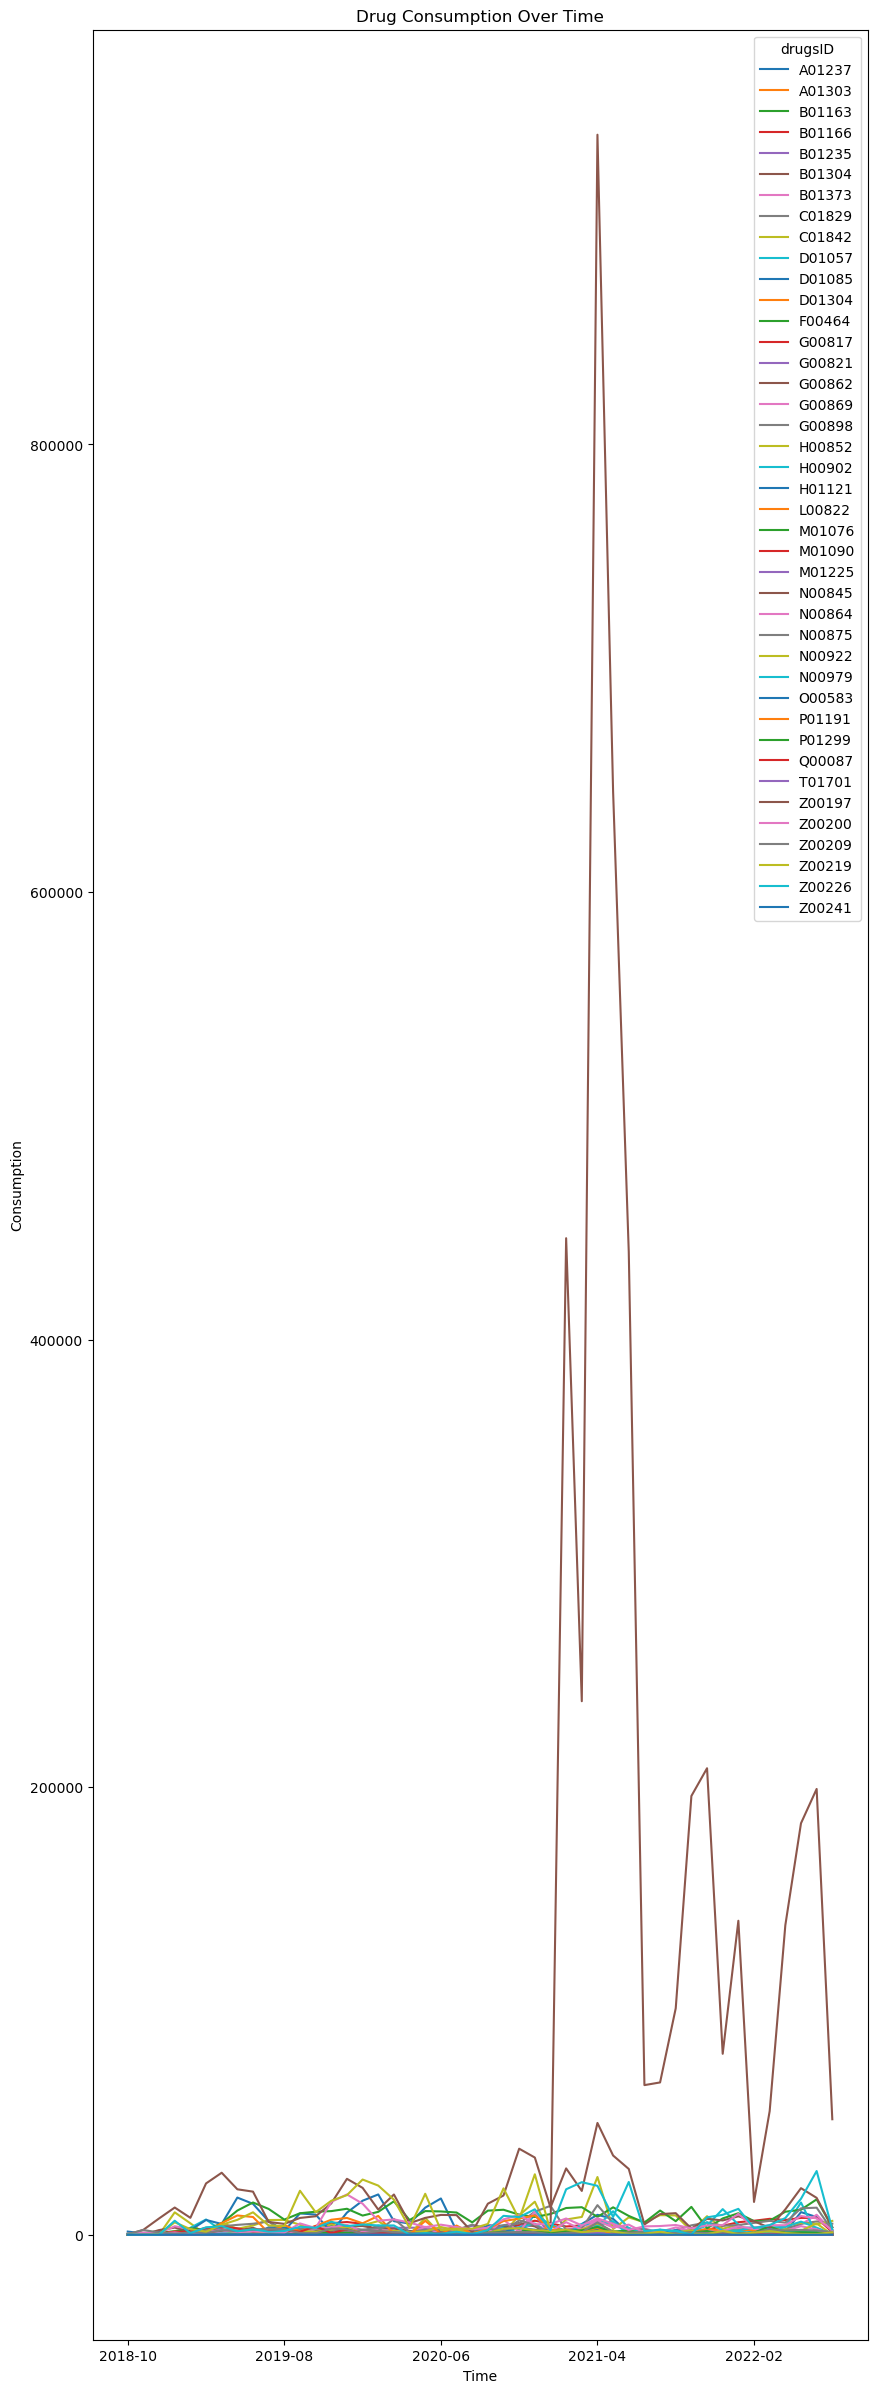

In [37]:
ax = df_month1.plot(kind='line', figsize=(10, 30), )

# set axis labels and chart title
ax.set_xlabel('Time')
ax.set_ylabel('Consumption')
ax.set_title('Drug Consumption Over Time')

In [38]:
len(df_month1.columns.unique())

41

In [39]:
df_month1.head()

drugsID,A01237,A01303,B01163,B01166,B01235,B01304,B01373,C01829,C01842,D01057,D01085,D01304,F00464,G00817,G00821,G00862,G00869,G00898,H00852,H00902,H01121,L00822,M01076,M01090,M01225,N00845,N00864,N00875,N00922,N00979,O00583,P01191,P01299,Q00087,T01701,Z00197,Z00200,Z00209,Z00219,Z00226,Z00241
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,0.0,0.0,30.0,50.0,0.0,0.0,460.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,30.0,350.0,300.0,0.0,0.0,0.0
2018-11,200.0,0.0,0.0,0.0,60.0,0.0,0.0,500.0,0.0,0.0,600.0,0.0,800.0,65.0,50.0,0.0,165.0,460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,200.0,0.0,2210.0,950.0,2100.0,100.0,0.0,0.0
2018-12,600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,0.0,800.0,10.0,150.0,2080.0,80.0,400.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,600.0,20.0,0.0,0.0,100.0,0.0,0.0,500.0,0.0,7270.0,520.0,1000.0,200.0,0.0,0.0
2019-01,200.0,500.0,50.0,0.0,0.0,0.0,0.0,0.0,10000.0,500.0,600.0,0.0,1600.0,0.0,50.0,3180.0,50.0,0.0,180.0,500.0,0.0,0.0,90.0,0.0,50.0,50.0,3800.0,770.0,0.0,500.0,100.0,1400.0,0.0,1350.0,0.0,12150.0,1010.0,500.0,5550.0,6250.0,0.0
2019-02,0.0,0.0,0.0,560.0,0.0,10.0,0.0,1000.0,5100.0,3100.0,2000.0,0.0,2840.0,60.0,70.0,1500.0,200.0,60.0,150.0,500.0,0.0,0.0,200.0,5.0,5.0,0.0,2500.0,30.0,0.0,0.0,150.0,0.0,0.0,1350.0,0.0,7550.0,250.0,1020.0,2500.0,700.0,10.0


#### Chọn 10 loại thuốc

In [40]:
column_sums = df_month1.sum(axis=0)
print(column_sums) 
top_values = column_sums.nlargest(10).index.tolist()
top_values

drugsID
A01237     102500.0
A01303      19434.0
B01163       7190.0
B01166     128390.0
B01235      49460.0
B01304       5258.0
B01373      74781.0
C01829      63920.0
C01842     215680.0
D01057     114840.0
D01085     184440.0
D01304      37540.0
F00464     383800.0
G00817       7092.0
G00821      19510.0
G00862      50452.0
G00869      22925.0
G00898     153400.0
H00852      12730.0
H00902      75500.0
H01121      46850.0
L00822       7362.0
M01076      21796.0
M01090       4162.0
M01225      12565.0
N00845    4234931.0
N00864     105530.0
N00875      68700.0
N00922      64250.0
N00979      29210.0
O00583       6480.0
P01191     110400.0
P01299      31980.0
Q00087      32980.0
T01701       2220.0
Z00197     655670.0
Z00200     214005.0
Z00209      60482.0
Z00219     269841.0
Z00226     277285.0
Z00241        991.0
dtype: float64


['N00845',
 'Z00197',
 'F00464',
 'Z00226',
 'Z00219',
 'C01842',
 'Z00200',
 'D01085',
 'G00898',
 'B01166']

In [46]:
mask = df_month['drugsID'].isin(top_values)

# Step 4: Select the rows that contain the top 7 values
df_top10 = df_month.loc[mask]
df_top10.drugsID.unique()
df_top10.describe(include='all')

,time,drugsID,order_numbers
count,432,432,432.000000
unique,46,10,NaN
top,2020-09,Z00197,NaN
freq,10,46,NaN
mean,NaN,NaN,15549.634259
std,NaN,NaN,66398.312389
min,NaN,NaN,20.000000
25%,NaN,NaN,1495.000000
50%,NaN,NaN,4210.000000
75%,NaN,NaN,8907.500000


In [47]:
df_top10.head()

,time,drugsID,order_numbers
3,2018-10,D01085,1400.0
6,2018-10,G00898,460.0
10,2018-10,Z00197,30.0
11,2018-10,Z00200,350.0
18,2018-11,D01085,600.0


### Check outliers

In [41]:
# def find_outliers(data):
#     # calculate quartiles
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     # calculate interquartile range
#     IQR = Q3 - Q1
#     # calculate upper and lower bounds for outliers
#     upper_bound = Q3 + 1.5*IQR
#     lower_bound = Q1 - 1.5*IQR
#     # find outliers
#     outliers = data[(data < lower_bound) | (data > upper_bound)]
#     return outliers

# outliers = find_outliers(df)



In [42]:
# Count number of outliers for each column
outlier_counts = []
for col in df.columns:
    outliers = find_outliers(df[col])
    outlier_counts.append(len(outliers))
print(outlier_counts)
max_outliers= max(outlier_counts)
print(max_outliers)

# Find columns with more than 17 outliers
cols_more_than_10_outliers = []
for i, count in enumerate(outlier_counts):
    if count > 7:
        cols_more_than_17_outliers.append(df.columns[i])

print(cols_more_than_17_outliers)


NameError: name 'find_outliers' is not defined

In [ ]:
from collections import Counter

count_dict = dict(Counter(outlier_counts))
print(count_dict)


{3: 21, 4: 20, 2: 41, 8: 12, 9: 18, 5: 20, 1: 35, 6: 22, 10: 15, 7: 11, 0: 15, 11: 4}


In [ ]:
def count_outliers(data):
    outliers, upper, lower = find_outliers(data)
    return len(outliers)

outlier_counts = df.apply(count_outliers)



drugsID
A01194     3
A01217     4
A01237     4
A01252     2
A01259     8
A01264     9
A01268     5
A01272     5
A01303     4
A01338     1
A01341     9
A01348     6
A01379    10
A01401     7
A01408     2
A01411     5
A01414     4
A01500     9
B01113     3
B01141     3
B01163     2
B01166     0
B01178     6
B01235     1
B01244    11
B01247     8
B01304     0
B01308     5
B01332     4
B01338     4
B01347     0
B01373     2
B01414     3
B01463     9
B01472     6
B01514    10
B01570     6
B01585     5
B01586     2
C01829     1
C01842     2
C01942    10
C02136    10
C02283     2
D01057     4
D01063     5
D01078     4
D01085     5
D01107     6
D01116     1
D01149     4
D01160     5
D01169     4
D01183    10
D01198     9
D01215     6
D01260     1
D01304     1
D01311    10
D01335     0
D01349     2
D01355     5
D01357     9
D01366    10
D01375     2
D01425     5
D01449     8
D01502     3
D01510     6
D01519    10
D01522     7
D01533     6
D01599     6
D01643     1
E00471    10
F00440     2
F004

In [ ]:
outlier_counts = [len(find_outliers(df[col])[0]) for col in df.columns]
cols_more_than_17_outliers = [col for i, col in enumerate(df.columns) if outlier_counts[i] > 17]
print(cols_more_than_17_outliers)


TypeError: object of type 'numpy.float64' has no len()

In [ ]:
df_above_upper

,year,month,value


In [ ]:
df_below_lower

,year,month,value


In [ ]:
outliers.head()

,year,month,value
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
